In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data=pd.read_csv("cities_by_day.csv")

In [196]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
City          29531 non-null object
Date          29531 non-null object
PM2.5         24933 non-null float64
PM10          18391 non-null float64
NO            25949 non-null float64
NO2           25946 non-null float64
NOx           25346 non-null float64
NH3           19203 non-null float64
CO            27472 non-null float64
SO2           25677 non-null float64
O3            25509 non-null float64
C6H6          23908 non-null float64
C7H8          21490 non-null float64
C8H10         11422 non-null float64
AQI           24850 non-null float64
AQI_Bucket    24850 non-null object
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [198]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [199]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Removing the null values

In [200]:
drop_list=["PM10","NH3","C8H10"]
data = data.drop(drop_list,axis=1)

In [201]:
data['Date'] = pd.to_datetime(data['Date'])

In [202]:
data.isnull().sum()

City             0
Date             0
PM2.5         4598
NO            3582
NO2           3585
NOx           4185
CO            2059
SO2           3854
O3            4022
C6H6          5623
C7H8          8041
AQI           4681
AQI_Bucket    4681
dtype: int64

In [203]:
data["NO2"]=data["NO2"].fillna(data.NO2.mean())
data["NOx"]=data["NOx"].fillna(data.NOx.mean())
data["CO"]=data["CO"].fillna(data.CO.mean())
data["SO2"]=data["SO2"].fillna(data.SO2.mean())
data["O3"]=data["O3"].fillna(data.O3.mean())
data["C6H6"]=data["C6H6"].fillna(data.C6H6.mean())
data["C7H8"]=data["C7H8"].fillna(data.C7H8.mean())
data["PM2.5"]=data["PM2.5"].fillna(data['PM2.5'].mean())

In [204]:
data["NO"]=data["NO"].fillna(data.NO.mean())

In [205]:
data["AQI"]=data["AQI"].fillna(data.AQI.mean())

In [206]:
data.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 13 columns):
City          29531 non-null object
Date          29531 non-null datetime64[ns]
PM2.5         29531 non-null float64
NO            29531 non-null float64
NO2           29531 non-null float64
NOx           29531 non-null float64
CO            29531 non-null float64
SO2           29531 non-null float64
O3            29531 non-null float64
C6H6          29531 non-null float64
C7H8          29531 non-null float64
AQI           29531 non-null float64
AQI_Bucket    24850 non-null object
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 2.9+ MB


Since AQI_Bucket is of category so  removing the null value by most frequent one 

In [208]:
data['AQI_Bucket'] = data['AQI_Bucket'].astype('category')

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

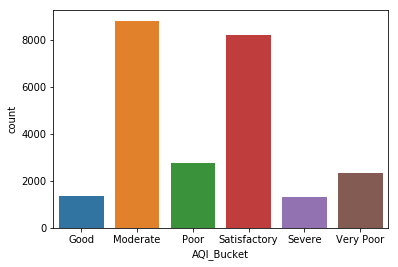

In [209]:
sns.countplot('AQI_Bucket',data=data)
data['AQI_Bucket'].value_counts()

In [210]:
replace = data["AQI_Bucket"].value_counts().argmax()
data["AQI_Bucket"]=data["AQI_Bucket"].fillna(replace)

In [211]:
data.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,Moderate


In [212]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
C6H6          0
C7H8          0
AQI           0
AQI_Bucket    0
dtype: int64

Removing the Outliers

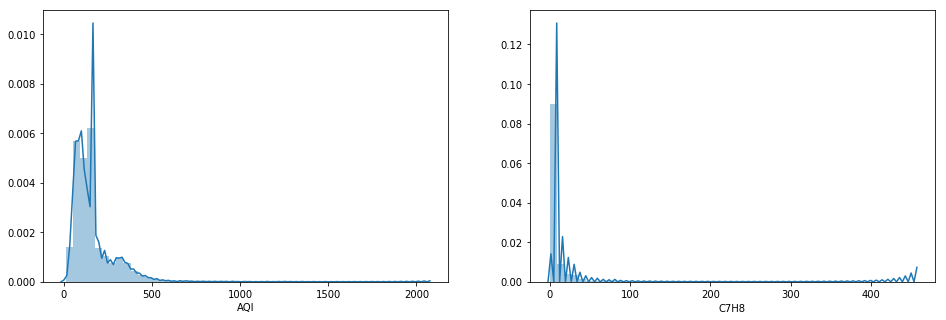

In [213]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['AQI'])
plt.subplot(1,2,2)
sns.distplot(data['C7H8'])
plt.show()

In [214]:
cols=[
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'CO',
 'SO2',
 'O3',
 'C6H6',
 'C7H8',
 'AQI',
 ]



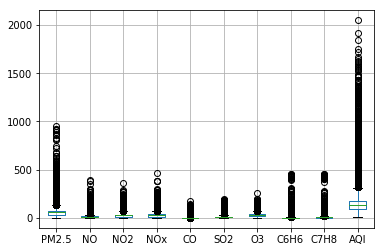

In [215]:
boxplot=data.boxplot(column=cols)
    

In [216]:
for x in cols:
    highest=data[x].mean() + 3*data[x].std()
    data=data[(data[x] < highest) ]

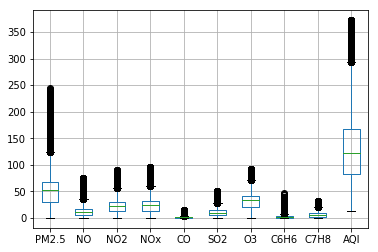

In [217]:
boxplot=data.boxplot(column=cols)

Barplot of city with respect to AQI

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

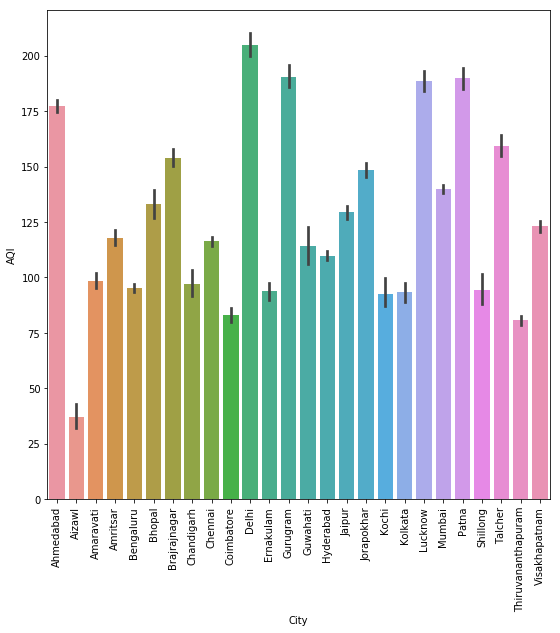

In [218]:
fig, ax = plt.subplots(figsize=(9,9))
chart=sns.barplot(x='City', y='AQI', data=data)
plt.xticks(rotation=90)

heatmap for datset

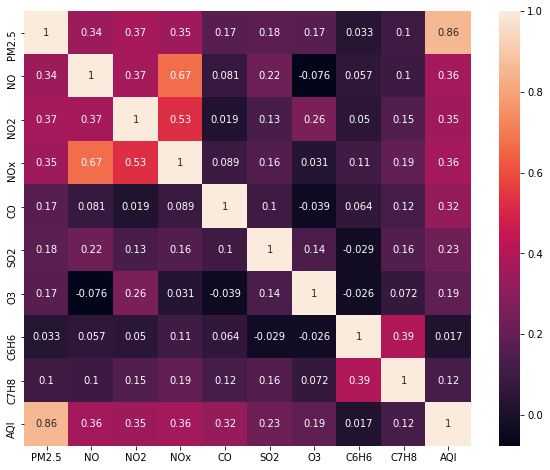

In [219]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)